In [2]:
# Perceptron gates: AND, OR, NOT (manual, fixed weights)

def step(x):
    return 1 if x >= 0 else 0

def perceptron_2in(x1, x2, w1, w2, theta):
    net = w1 * x1 + w2 * x2
    return step(net - theta), net

def perceptron_1in(x, w, theta):
    net = w * x
    return step(net - theta), net

# -------- AND gate --------
# Use w=[1,1], theta=1.5  → fires only when both inputs are 1
print("AND gate (w=[1,1], θ=1.5)")
print("x1 x2 | net  | y  | target")
for x1, x2, t in [(0,0,0),(0,1,0),(1,0,0),(1,1,1)]:
    y, net = perceptron_2in(x1, x2, 1, 1, 1.5)
    print(f"{x1:>2} {x2:>2} | {net:>3}  | {y:>1}  | {t}")
print()

# -------- OR gate --------
# Use w=[1,1], theta=0.5  → fires when at least one input is 1
print("OR gate (w=[1,1], θ=0.5)")
print("x1 x2 | net  | y  | target")
for x1, x2, t in [(0,0,0),(0,1,1),(1,0,1),(1,1,1)]:
    y, net = perceptron_2in(x1, x2, 1, 1, 0.5)
    print(f"{x1:>2} {x2:>2} | {net:>3}  | {y:>1}  | {t}")
print()

# -------- NOT gate --------
# Use w=-1, θ=-0.5  → outputs 1 when input is 0, else 0
print("NOT gate (w=-1, θ=-0.5)")
print(" x | net  | y  | target")
for x, t in [(0,1),(1,0)]:
    y, net = perceptron_1in(x, -1, -0.5)
    print(f"{x:>2} | {net:>3}  | {y:>1}  | {t}")


AND gate (w=[1,1], θ=1.5)
x1 x2 | net  | y  | target
 0  0 |   0  | 0  | 0
 0  1 |   1  | 0  | 0
 1  0 |   1  | 0  | 0
 1  1 |   2  | 1  | 1

OR gate (w=[1,1], θ=0.5)
x1 x2 | net  | y  | target
 0  0 |   0  | 0  | 0
 0  1 |   1  | 1  | 1
 1  0 |   1  | 1  | 1
 1  1 |   2  | 1  | 1

NOT gate (w=-1, θ=-0.5)
 x | net  | y  | target
 0 |   0  | 1  | 1
 1 |  -1  | 0  | 0


In [1]:
import numpy as np

# Step 1: Define the Activation Function (Step Function)
def activation_function(x):
    return np.where(x >= 0, 1, 0)   # Threshold activation

# Step 2: Perceptron Training Function
def perceptron_train(X, y, learning_rate=0.1, epochs=10):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    print("Initial Weights:", weights)
    print("Initial Bias:", bias)

    # Training process
    for epoch in range(epochs):
        for inputs, target in zip(X, y):
            linear_output = np.dot(inputs, weights) + bias
            predicted = activation_function(linear_output)
            error = target - predicted

            # Weight and bias updates
            weights += learning_rate * error * inputs
            bias += learning_rate * error

        print(f"Epoch {epoch+1}: Weights={weights}, Bias={bias}")

    return weights, bias

# Step 3: Perceptron Prediction Function
def perceptron_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    predictions = activation_function(linear_output)
    return predictions

# --------------------------------------------
# Train for AND Function
# --------------------------------------------
print("\n### Training Perceptron for AND Function ###")

# Input: all possible combinations of 2 binary inputs
X = np.array([[0,0], [0,1], [1,0], [1,1]])

# Output for AND logic
y_and = np.array([0, 0, 0, 1])

# Train perceptron
w_and, b_and = perceptron_train(X, y_and, learning_rate=0.1, epochs=10)

# Test perceptron
print("\nAND Function Results:")
print("Input\tOutput")
for inp in X:
    print(f"{inp}\t{perceptron_predict(inp, w_and, b_and)}")


# --------------------------------------------
# Train for OR Function
# --------------------------------------------
print("\n### Training Perceptron for OR Function ###")

# Output for OR logic
y_or = np.array([0, 1, 1, 1])

# Train perceptron
w_or, b_or = perceptron_train(X, y_or, learning_rate=0.1, epochs=10)

# Test perceptron
print("\nOR Function Results:")
print("Input\tOutput")
for inp in X:
    print(f"{inp}\t{perceptron_predict(inp, w_or, b_or)}")


### Training Perceptron for AND Function ###
Initial Weights: [0. 0.]
Initial Bias: 0
Epoch 1: Weights=[0.1 0.1], Bias=0.0
Epoch 2: Weights=[0.2 0.1], Bias=-0.1
Epoch 3: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 4: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 5: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 6: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 7: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 8: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 9: Weights=[0.2 0.1], Bias=-0.20000000000000004
Epoch 10: Weights=[0.2 0.1], Bias=-0.20000000000000004

AND Function Results:
Input	Output
[0 0]	0
[0 1]	0
[1 0]	0
[1 1]	1

### Training Perceptron for OR Function ###
Initial Weights: [0. 0.]
Initial Bias: 0
Epoch 1: Weights=[0.  0.1], Bias=0.0
Epoch 2: Weights=[0.1 0.1], Bias=0.0
Epoch 3: Weights=[0.1 0.1], Bias=-0.1
Epoch 4: Weights=[0.1 0.1], Bias=-0.1
Epoch 5: Weights=[0.1 0.1], Bias=-0.1
Epoch 6: Weights=[0.1 0.1], Bias=-0.1
Epoch 7: Weights=[0.1 0.1

In [2]:
#Perceptron ANN for 3-Input AND and OR Logic Gates

import numpy as np

# Step 1: Activation Function (Step Function)
def activation_function(x):
    return np.where(x >= 0, 1, 0)

# Step 2: Perceptron Training Function
def perceptron_train(X, y, learning_rate=0.1, epochs=15):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    print("Initial Weights:", weights)
    print("Initial Bias:", bias)

    # Training
    for epoch in range(epochs):
        for inputs, target in zip(X, y):
            linear_output = np.dot(inputs, weights) + bias
            predicted = activation_function(linear_output)
            error = target - predicted

            # Update weights and bias
            weights += learning_rate * error * inputs
            bias += learning_rate * error

        print(f"Epoch {epoch+1}: Weights={weights}, Bias={bias}")

    return weights, bias

# Step 3: Prediction Function
def perceptron_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return activation_function(linear_output)

# ----------------------------------------------------------
# Training for 3-input AND Gate
# ----------------------------------------------------------
print("\n### Training Perceptron for 3-INPUT AND Function ###")

# Inputs: all combinations of 3 binary inputs
X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])

# Output for AND gate
y_and = np.array([0,0,0,0,0,0,0,1])

# Train perceptron
w_and, b_and = perceptron_train(X, y_and, learning_rate=0.1, epochs=15)

# Test perceptron
print("\n3-Input AND Gate Results:")
print("Input\t\tOutput")
for inp in X:
    print(f"{inp}\t{perceptron_predict(inp, w_and, b_and)}")

# ----------------------------------------------------------
# Training for 3-input OR Gate
# ----------------------------------------------------------
print("\n### Training Perceptron for 3-INPUT OR Function ###")

# Output for OR gate
y_or = np.array([0,1,1,1,1,1,1,1])

# Train perceptron
w_or, b_or = perceptron_train(X, y_or, learning_rate=0.1, epochs=15)

# Test perceptron
print("\n3-Input OR Gate Results:")
print("Input\t\tOutput")
for inp in X:
    print(f"{inp}\t{perceptron_predict(inp, w_or, b_or)}")


### Training Perceptron for 3-INPUT AND Function ###
Initial Weights: [0. 0. 0.]
Initial Bias: 0
Epoch 1: Weights=[0.1 0.1 0.1], Bias=0.0
Epoch 2: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 3: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 4: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 5: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 6: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 7: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 8: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 9: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 10: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 11: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 12: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 13: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 14: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004
Epoch 15: Weights=[0.1 0.1 0.1], Bias=-0.20000000000000004

3-Input AND Gate Results:
Input		Output
[0

In [3]:
#XOR is not linearly separable.
import numpy as np

# XOR dataset
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)
y = np.array([0, 1, 1, 0], dtype=float)   # XOR labels

def step(z):
    return (z >= 0).astype(float)

def train_perceptron(X, y, lr=0.1, epochs=500, seed=42, verbose=False):
    rng = np.random.default_rng(seed)
    w = rng.normal(0, 0.1, size=X.shape[1])
    b = 0.0

    for ep in range(epochs):
        # shuffle each epoch
        idx = rng.permutation(len(X))
        Xs, ys = X[idx], y[idx]

        for xi, ti in zip(Xs, ys):
            z = np.dot(w, xi) + b
            yhat = step(z)
            err = ti - yhat
            # perceptron update
            w += lr * err * xi
            b += lr * err

        # check accuracy after epoch
        preds = step(X @ w + b)
        acc = (preds == y).mean()
        if verbose and (ep+1) % 50 == 0:
            print(f"epoch {ep+1:3d}  acc={acc:.2f}  w={w}  b={b:.3f}")
        if acc == 1.0:
            # would indicate linear separability & success
            break

    return w, b, acc, preds

# Try several random initializations to show it never hits 100%
best = 0
for seed in range(10):
    w, b, acc, preds = train_perceptron(X, y, lr=0.1, epochs=1000, seed=seed)
    best = max(best, acc)

    print(f"seed={seed:2d}  final acc={acc:.2f}  weights={w}  bias={b:.3f}  preds={preds.astype(int)}")

print("\nBest accuracy across seeds:", best)
assert best < 1.0, "A single-layer perceptron should NOT perfectly solve XOR."

# For clarity, print the truth table with predictions from the last run
print("\nTruth table vs predictions (last run):")
for xi, ti, pi in zip(X, y.astype(int), preds.astype(int)):
    print(f"X={xi}  y={ti}  perceptron_pred={pi}")

seed= 0  final acc=0.25  weights=[-0.08742698 -0.01321049]  bias=0.000  preds=[1 0 0 0]
seed= 1  final acc=0.25  weights=[-0.06544158  0.08216181]  bias=0.000  preds=[1 1 0 1]
seed= 2  final acc=0.50  weights=[ 0.01890534 -0.05227484]  bias=-0.100  preds=[0 0 0 0]
seed= 3  final acc=0.50  weights=[0.00409191 0.0444335 ]  bias=0.000  preds=[1 1 1 1]
seed= 4  final acc=0.25  weights=[-0.06517912 -0.01747173]  bias=0.000  preds=[1 0 0 0]
seed= 5  final acc=0.50  weights=[0.01980686 0.0675641 ]  bias=-0.100  preds=[0 0 0 0]
seed= 6  final acc=0.50  weights=[0.00531158 0.07764913]  bias=0.000  preds=[1 1 1 1]
seed= 7  final acc=0.50  weights=[0.00012302 0.02987455]  bias=0.000  preds=[1 1 1 1]
seed= 8  final acc=0.50  weights=[0.02617336 0.16633572]  bias=-0.100  preds=[0 1 0 1]
seed= 9  final acc=0.50  weights=[0.01971631 0.12428499]  bias=0.000  preds=[1 1 1 1]

Best accuracy across seeds: 0.5

Truth table vs predictions (last run):
X=[0. 0.]  y=0  perceptron_pred=1
X=[0. 1.]  y=1  percep

Why it fails (intuition)

A perceptron draws one straight line (a linear decision boundary).

XOR needs two half-planes (or equivalent), which requires at least one hidden layer (i.e., a multi-layer perceptron with a nonlinear activation).

Learned Weights: [-0.84638261  0.66389201], Bias: 0.0
Training Accuracy: 90.00%


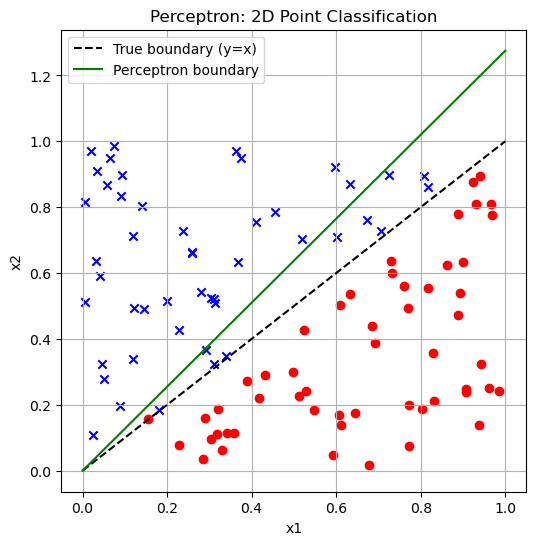

In [5]:
#Perceptron for Classifying Points in 2D Space

# ------------------------------------------------------------
# Perceptron Example: Classifying 2D Points (Above/Below Line)
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 2D data points
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points (x1, x2) in [0,1]
y = np.where(X[:, 1] > X[:, 0], 1, 0)  # Class 1 if y>x, else 0

# Step 2: Define activation and perceptron training
def activation(x):
    return np.where(x >= 0, 1, 0)

def perceptron_train(X, y, learning_rate=0.1, epochs=20):
    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        for xi, target in zip(X, y):
            z = np.dot(weights, xi) + bias
            y_pred = activation(z)
            error = target - y_pred
            weights += learning_rate * error * xi
            bias += learning_rate * error
    return weights, bias

# Step 3: Train the perceptron
weights, bias = perceptron_train(X, y, learning_rate=0.1, epochs=15)
print(f"Learned Weights: {weights}, Bias: {bias}")

# Step 4: Make predictions
def predict(X, weights, bias):
    return activation(np.dot(X, weights) + bias)

y_pred = predict(X, weights, bias)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy*100:.2f}%")

# Step 5: Visualize results
plt.figure(figsize=(6,6))
for xi, yi in zip(X, y):
    if yi == 0:
        plt.scatter(xi[0], xi[1], color='red', marker='o')
    else:
        plt.scatter(xi[0], xi[1], color='blue', marker='x')

# Plot true decision boundary (y = x)
x_line = np.linspace(0,1,100)
plt.plot(x_line, x_line, 'k--', label='True boundary (y=x)')

# Plot learned decision boundary from perceptron
# w1*x1 + w2*x2 + b = 0 → x2 = -(w1*x1 + b)/w2
x_boundary = np.linspace(0,1,100)
y_boundary = -(weights[0]*x_boundary + bias)/weights[1]
plt.plot(x_boundary, y_boundary, 'g-', label='Perceptron boundary')

plt.title("Perceptron: 2D Point Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


The perceptron is the simplest form of a neural network — it can learn to separate linearly separable data (like dividing a plane into two regions).
Once you move to non-linear data (like circles, spirals, or XOR), you need multi-layer networks.

In [1]:
#XOR using Multilayer Perceptron (Manual Implementation)

def step(x):
    return 1 if x >= 0 else 0

# Input dataset for XOR
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

# Expected XOR outputs
Y = [0, 1, 1, 0]

# -----
# Network weights (from the BITS slide)
# -----
# Hidden layer
w_n1 = [1, 1]   # weights for neuron n1
theta_n1 = 1    # threshold for n1

w_n2 = [-1, -1] # weights for neuron n2
theta_n2 = -1   # threshold for n2

# Output layer
w_n3 = [1, 1]   # weights from n1, n2 to output n3
theta_n3 = 2    # threshold for n3

print("x1  x2  n1  n2  output  target")
print("-"*35)

# Forward pass for all inputs
for (x1, x2), target in zip(X, Y):
    # Hidden layer
    net_n1 = w_n1[0]*x1 + w_n1[1]*x2
    n1 = step(net_n1 - theta_n1)

    net_n2 = w_n2[0]*x1 + w_n2[1]*x2
    n2 = step(net_n2 - theta_n2)

    # Output layer
    net_n3 = w_n3[0]*n1 + w_n3[1]*n2
    y = step(net_n3 - theta_n3)

    print(f"{x1:>2}  {x2:>2}   {n1:>2}  {n2:>2}    {y:>2}      {target}")

x1  x2  n1  n2  output  target
-----------------------------------
 0   0    0   1     0      0
 0   1    1   1     1      1
 1   0    1   1     1      1
 1   1    1   0     0      0


Explanation

Hidden Neuron n₁ acts like OR gate (weights = +1, threshold = 1)

Hidden Neuron n₂ acts like NAND-like detector (weights = −1, threshold = −1)

